definimos o caminho dos arquivos de áudio utilizados:

        ---> DATASET_PATH: Caminho para o conjunto de dados de gêneros musicais.

        ---> SAMPLE_GENRE: O gênero musical do arquivo que iremos analisar (neste caso, 'blues').

        ---> SAMPLE_FILE: O nome do arquivo de áudio.

        ---> FILE_PATH: Construção do caminho completo até o arquivo utilizando os.path.join.


Decidimos usar a librosa.load para carregar os arquivos de áudio.

        ---> sr=22050: definimos a taxa de amostragem do áudio em 22050 Hz, que é uma taxa padrão para processamento de áudio.

        ---> signal: Contém o sinal de áudio em si (amplitudes ao longo do tempo).

        ---> sample_rate: A taxa de amostragem real utilizada ao carregar o áudio.



plotamos a waveform do áudio para visualizar como a amplitude varia ao longo do tempo. Isso nos dá uma ideia geral do conteúdo do áudio e de suas características temporais.

        ---> plt.figure(figsize=(15, 5)): define tamanho do gáfico.
        
        ---> librosa.display.waveshow: função utilizada para plotar a forma de onda do áudio.

        ---> alpha=0.5: Define a transparência da linha da forma de onda, o que pode ajudar na visualização.

                Eixos:

                --> X (Tempo em segundos): Mostra a duração do áudio.
                --> Y (Amplitude): Mostra a intensidade do sinal em cada ponto no tempo.

 A forma de onda nos dá uma visão geral do áudio, permitindo identificar partes mais silenciosas ou mais intensas.


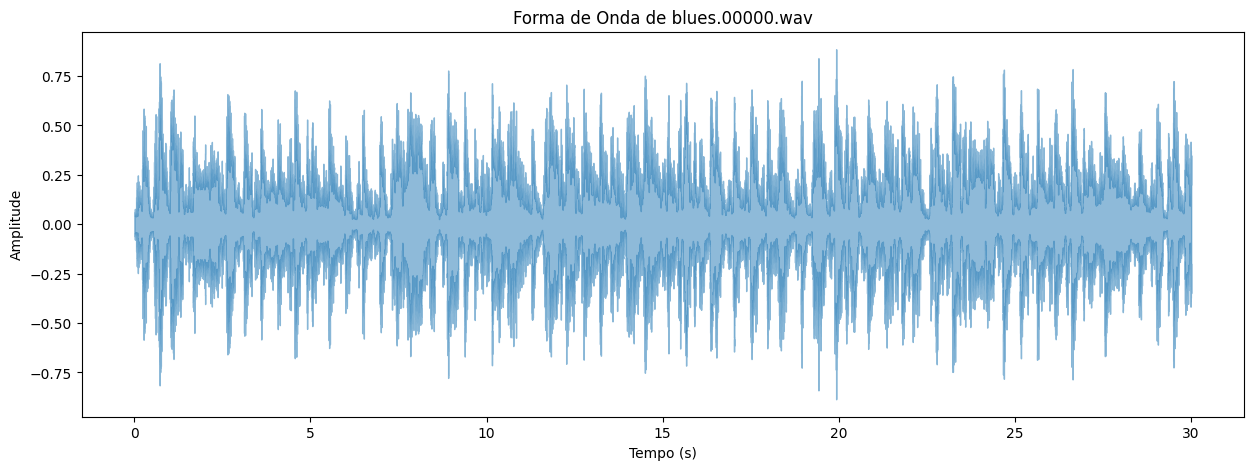

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

DATASET_PATH = "../data/genres_original/"
SAMPLE_GENRE = 'blues'
SAMPLE_FILE = 'blues.00000.wav'
FILE_PATH = os.path.join(DATASET_PATH, SAMPLE_GENRE, SAMPLE_FILE)

# carrega arquivo de aúdio
signal, sample_rate = librosa.load(FILE_PATH, sr=22050)

# mostra waveform do arquivo de aúdio
plt.figure(figsize=(15, 5))
librosa.display.waveshow(signal, sr=sample_rate, alpha=0.5)
plt.title("Forma de Onda de {}".format(SAMPLE_FILE))
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()



Realizamos também a Transformada Rápida de Fourier (FFT). A FFT nos permite transformar o sinal do domínio do tempo para o domínio da frequência, mostrando quais frequências estão presentes no áudio e com quais intensidades.

        ---> np.fft.fft(signal): Calcula a FFT do sinal de áudio.

        ---> magnitude = np.abs(fft): Obtém a magnitude (intensidade) de cada componente de frequência.
        
        ---> frequency = np.linspace(0, sample_rate, len(magnitude)): Cria um array de frequências que correspondem aos valores na FFT.


        -----> Metade Positiva: Como a FFT de um sinal real é simétrica, só precisamos da primeira metade (frequências positivas).


Analisar as frequências nos ajuda a entender a composição tonal do áudio.


O gráfico abaixo nos permite visualizar o espectro de potência para ver como as magnitudes das frequências variam.

                -- O gráfico mostra a magnitude das frequências em relação às frequências em Hz.

                -- Picos no gráfico indicam frequências que são mais proeminentes no áudio.

                -- Isso pode revelar características importantes, como notas musicais predominantes ou harmônicos.


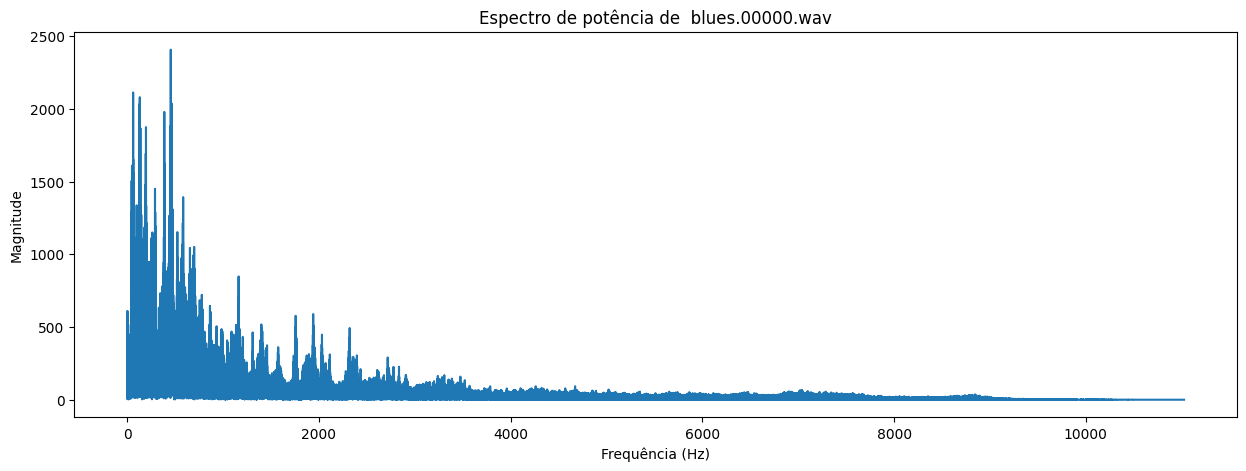

In [2]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sample_rate, len(magnitude))

# divide as partes positivas e negativas do espectro
left_frequency = frequency[:len(frequency)//2]
left_magnitude = magnitude[:len(magnitude)//2]

# plota o spectro
plt.figure(figsize=(15, 5))
plt.plot(left_frequency, left_magnitude)
plt.title("Espectro de potência de  {}".format(SAMPLE_FILE))
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.show()


Para ver como as frequências mudam ao longo do tempo, usamos a STFT, que calcula a FFT em pequenas janelas do sinal.



        --- n_fft: Tamanho da janela de FFT. Um valor maior dá melhor resolução em frequência, mas pior em tempo.

        --- hop_length: Define quanto a janela se desloca a cada passo. Um valor menor significa mais sobreposição entre janelas.

        ---  librosa.stft: Calcula a STFT do sinal, resultando em um array 2D (tempo x frequência).

        ---- spectrogram: A magnitude da STFT, representando a intensidade das frequências ao longo do tempo.


O espectrograma é uma representação visual que mostra como o conteúdo espectral do sinal varia com o tempo. Ele é util para visualizar mudanças de frequência ao longo do tempo.

No espectrograma, cada ponto representa a intensidade de uma frequência em um determinado momento, com cores mais quentes indicando maior intensidade.

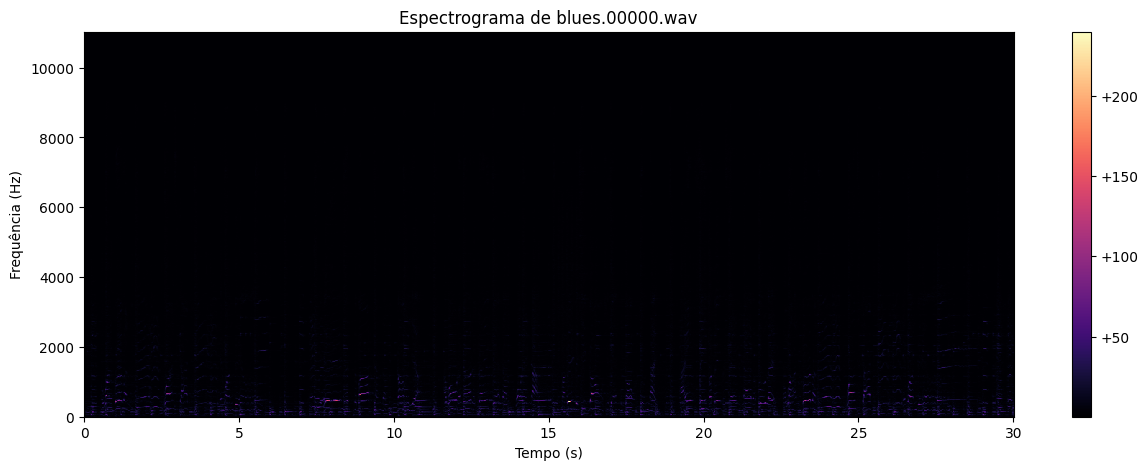

In [3]:
# Realizar a STFT para obter o espectrograma
n_fft = 2048  # Número de amostras por FFT
hop_length = 512  # Número de amostras entre janelas

stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)

# Exibir o espectrograma
plt.figure(figsize=(15, 5))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format="%+2.f")
plt.title("Espectrograma de {}".format(SAMPLE_FILE))
plt.xlabel("Tempo (s)")
plt.ylabel("Frequência (Hz)")
plt.show()


A percepção humana de som é logarítmica, então faz sentido converter as amplitudes para decibéis para melhor representar como ouvimos.

Isso facilita a visualização de componentes de baixa intensidade que podem ser importantes.

Ao usar decibéis, conseguimos destacar detalhes que não seriam tão evidentes em escala linear.


Por fim, plotamos o espectrograma com a amplitude em decibéis e a frequência em escala logarítmica, o que é mais alinhado com a percepção humana.


Isso é útil porque a percepção humana de frequência também é logarítmica.

O espectrograma logarítmico permite visualizar melhor tanto frequências baixas quanto altas.


Essa visualização é especialmente útil para analisar sinais musicais complexos.


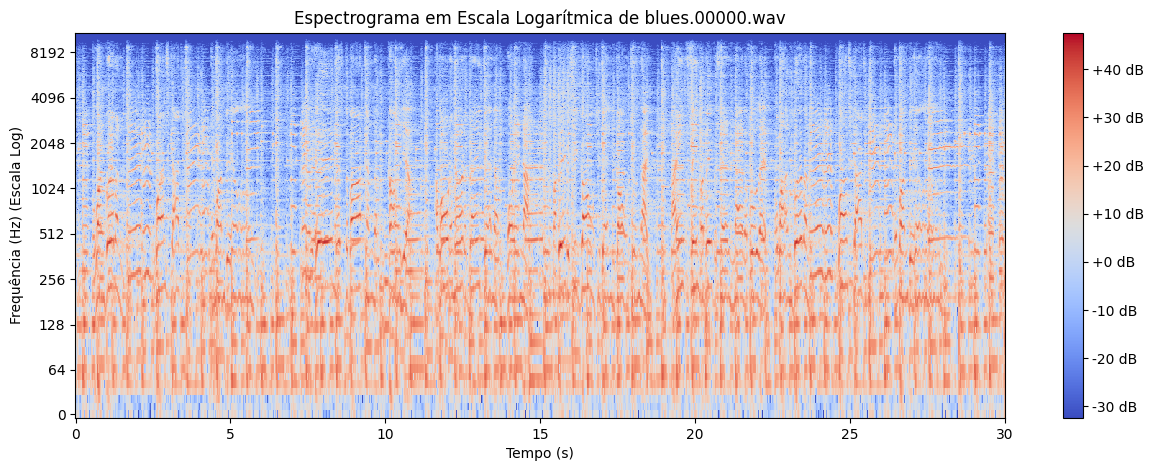

In [4]:
# Converter amplitude para decibéis
log_spectrogram = librosa.amplitude_to_db(spectrogram)


# Exibir o espectrograma em escala logarítmica
plt.figure(figsize=(15, 5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.f dB")
plt.title("Espectrograma em Escala Logarítmica de {}".format(SAMPLE_FILE))
plt.xlabel("Tempo (s)")
plt.ylabel("Frequência (Hz) (Escala Log)")
plt.show()



Extraindo os Coeficientes Cepstrais de Freqüência Mel (MFCCs)


MFCCs são uma representação compacta do espectro de potência do áudio, mapeados para uma escala Mel que aproxima a percepção humana.

        ---> librosa.feature.mfcc: Função para calcular os MFCCs do sinal de áudio.

        ---> n_mfcc=13: Extrai os 13 primeiros coeficientes, que são os mais relevantes.



Os MFCCs são amplamente utilizados em reconhecimento de voz e música porque capturam características essenciais do áudio.


Eles servem como entradas ideais para algoritmos de aprendizado de máquina, reduzindo a dimensionalidade dos dados sem perder informações importantes.


visualizar os MFCCs nos permite também entender melhor como eles variam ao longo do tempo.


Cada linha no gráfico representa um dos coeficientes MFCC.

As variações nos coeficientes ao longo do tempo refletem mudanças nas características do áudio.

Podemos observar padrões que podem ser úteis para distinguir entre diferentes gêneros musicais.



Visualizar os MFCCs nos dá intuição sobre como esses coeficientes representam o áudio e por que são úteis para classificação.

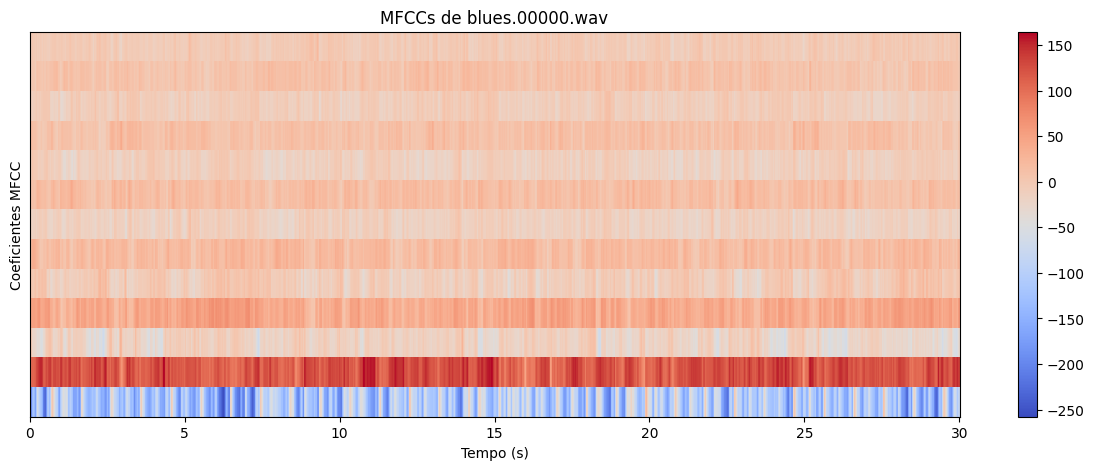

In [5]:
# extração de MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13, n_fft=n_fft, hop_length=hop_length)

# Exibir os MFCCs
plt.figure(figsize=(15, 5))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length, x_axis='time')
plt.colorbar()
plt.title("MFCCs de {}".format(SAMPLE_FILE))
plt.xlabel("Tempo (s)")
plt.ylabel("Coeficientes MFCC")
plt.show()

